In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.plotly as py # for the world map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# EDA: World Happiness Report

In [150]:
wh = pd.read_csv("whr_2017.csv") 
wh.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [67]:
wh.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


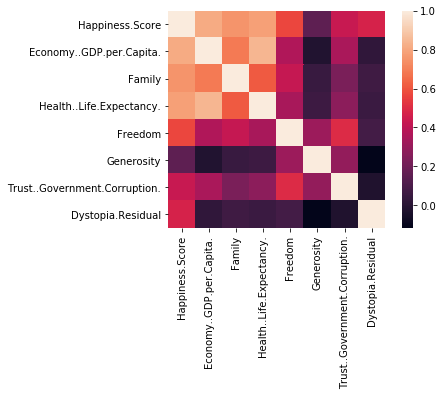

In [68]:
# create a subset of the data
wh1 = wh[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom', 
          'Generosity','Trust..Government.Corruption.','Dystopia.Residual']]
cor = wh1.corr() # calculate the correlation of the feature matrix
sns.heatmap(cor, square = True);plt.show() # plot correlation as heat map

In [69]:
# ACHTUNG: dieser Abschnitt ist nicht klausurrelevant!
# Reference: https://plot.ly/python/choropleth-maps/
data = dict(type = 'choropleth', 
           locations = wh['Country'],
           locationmode = 'country names',
           z = wh['Happiness.Score'], 
           text = wh['Country'],
           colorbar = {'title':'Happiness'})

layout = dict(title = 'Happiness Index 2017', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [70]:
wh1.head()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


# StandardScaling (normalize to improve usage of Euclidian Distance)

In [1]:
scaler = StandardScaler()
wh1_scaled = pd.DataFrame(scaler.fit_transform(wh1))

NameError: name 'StandardScaler' is not defined

In [83]:
wh1_scaled.head()

,0,1,2,3,4,5,6,7
0,1.935996,1.506188,1.203577,1.038167,1.515836,0.856964,1.903084,0.856296
1,1.922693,1.186518,1.265036,1.020812,1.452859,0.806856,2.739998,0.929891
2,1.906730,1.182345,1.472669,1.194259,1.460590,1.702013,0.300066,0.947964
3,1.897861,1.383442,1.145561,1.298272,1.413155,0.325028,2.406809,0.855673
4,1.875689,1.093985,1.227057,1.091026,1.398978,-0.010426,2.560800,1.163581


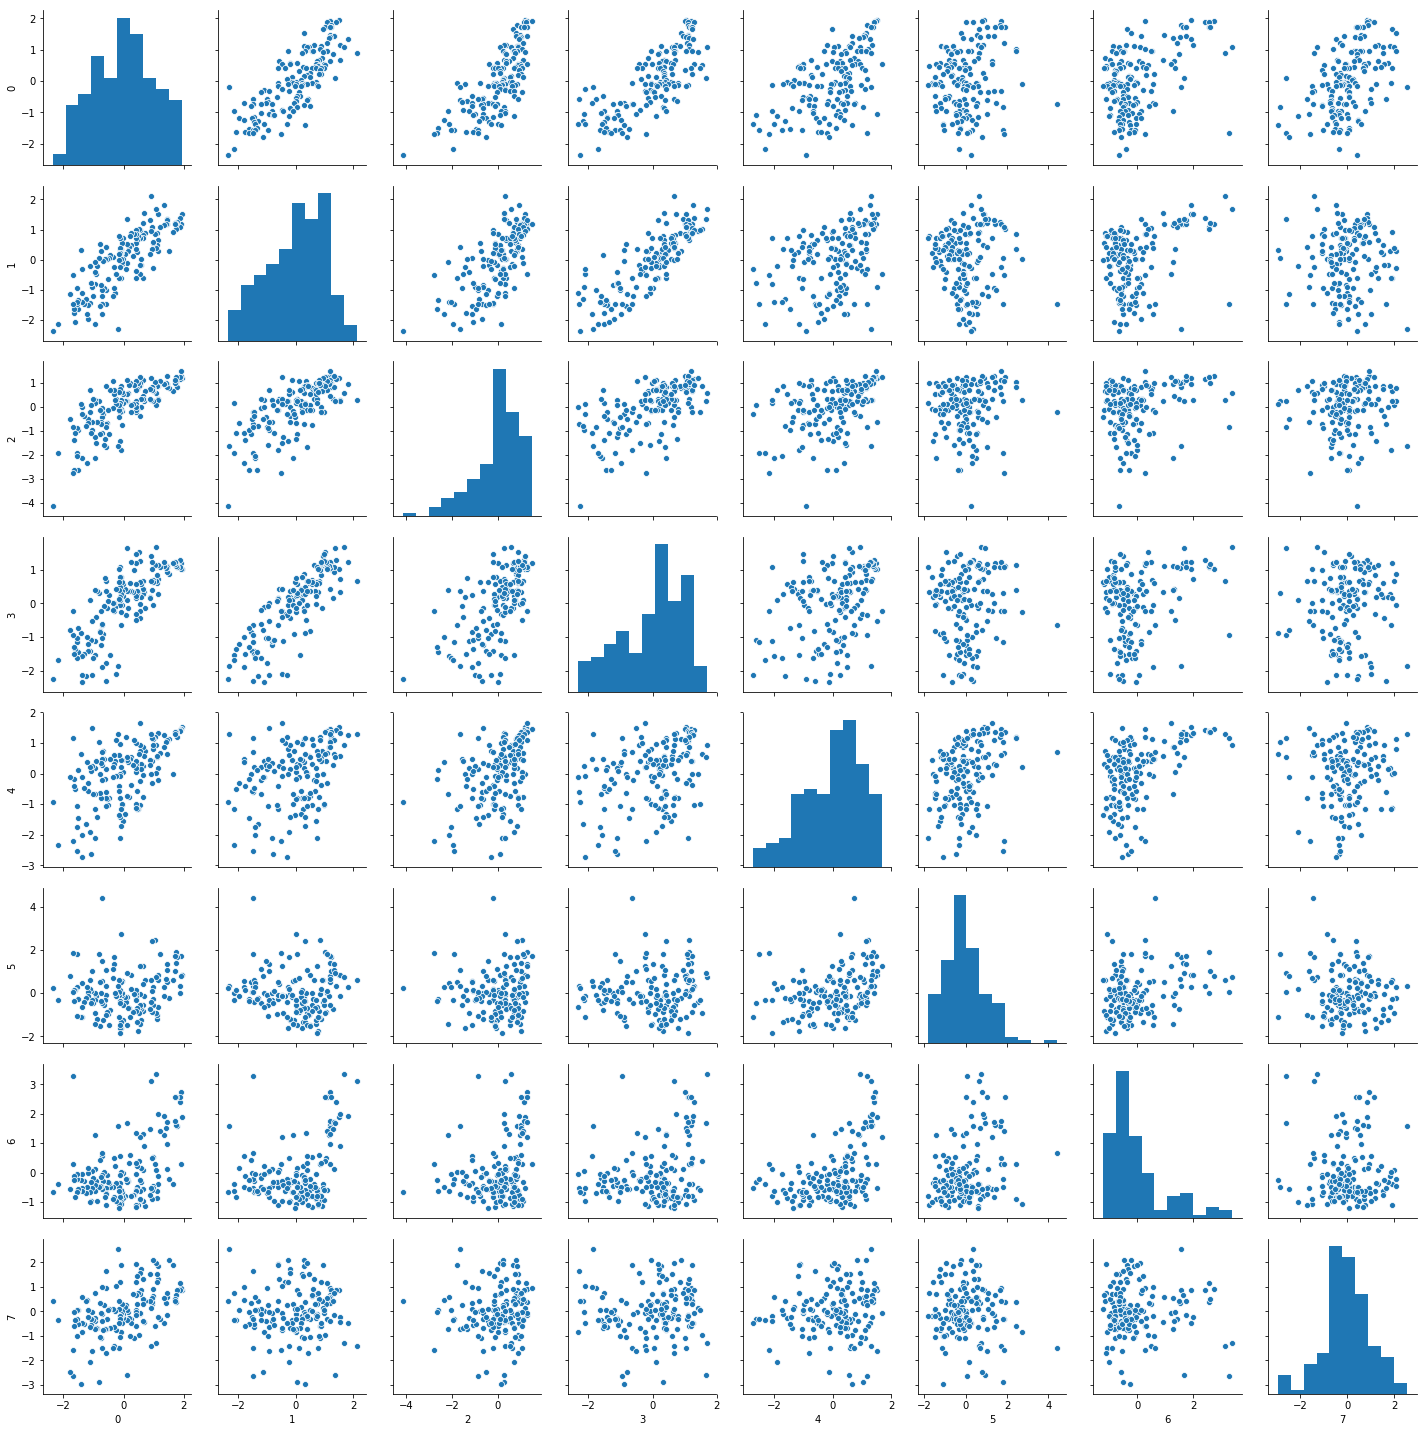

In [88]:
sns.pairplot(data=wh1_scaled);plt.show()

# Perform Clustering

In [143]:
model = KMeans(2)

model.fit(wh1_scaled)
clust_labels = model.predict(wh1_scaled)
clust_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

# Inspect Results

In [99]:
wh1_viz = wh1.copy()
wh1_viz['cluster'] = clust_labels

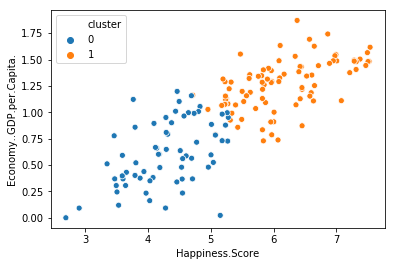

In [100]:
sns.scatterplot(data=wh1_viz, x='Happiness.Score', y='Economy..GDP.per.Capita.', hue='cluster'); plt.show()

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\peer.kueppers\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce



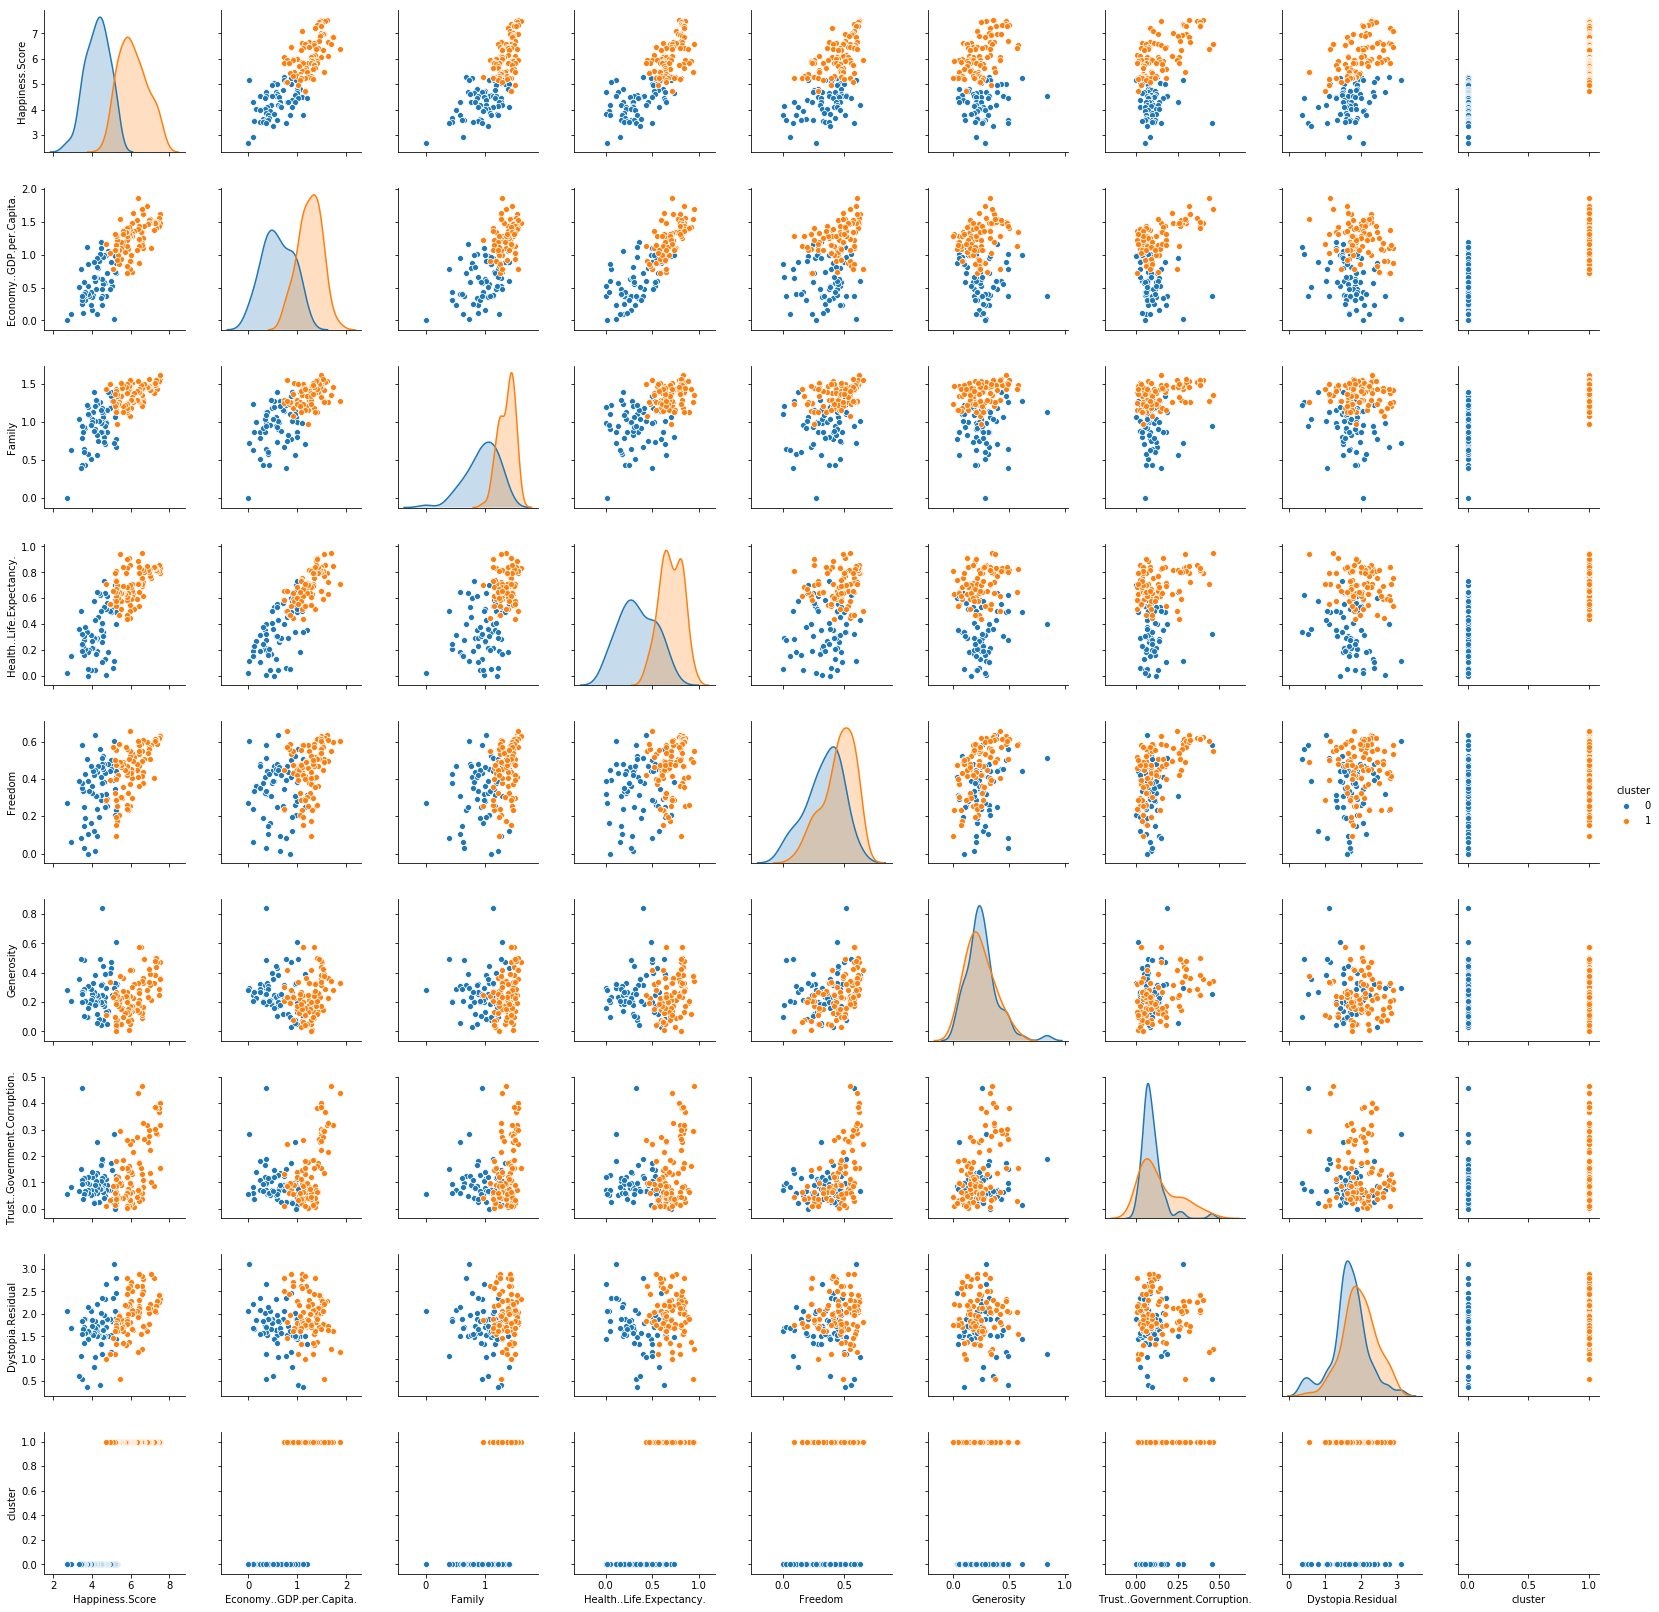

In [101]:
sns.pairplot(data=wh1_viz, hue='cluster');plt.show()

In [102]:
wh1_viz['Country'] = wh.iloc[:,0]

# nicht klausurrelevant
data = [dict(type='choropleth',
             locations = wh1_viz['Country'],
             locationmode = 'country names',
             z = wh1_viz['cluster'],
             text = wh1_viz['Country'],
             colorbar = {'title':'Cluster'})]

layout = dict(title='Clustering of Countries based on K-Means',
              geo=dict(showframe = False,
                       projection = {'type':'mercator'}))

map1 = go.Figure(data = data, layout=layout)
iplot(map1)

# Finding the optimal k
## Sum of squared errors for k=2

In [105]:
# our clustering with k=2 leads to the following SSE
model.inertia_

840.2419915138407

## Visualization in a Dendogram
Show the proximity of all samples (rows) and all columns. We are interested in inspecting the proximity of samples to get an idea about the number of clusters we are dealing with.

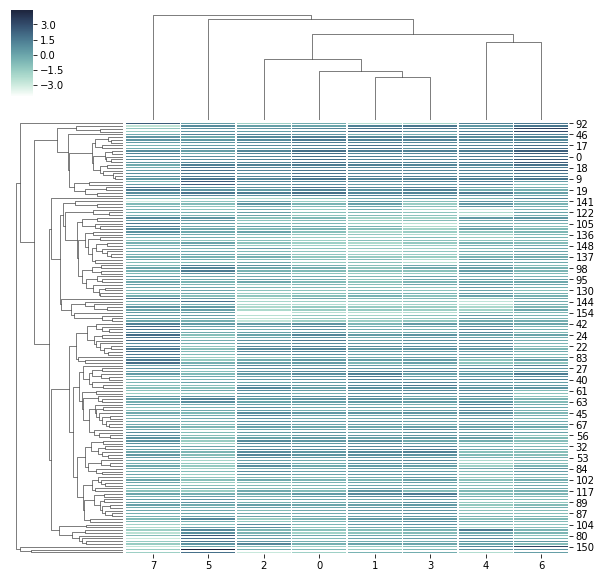

In [188]:
# nicht klausurrelevant!
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sns.clustermap(wh1_scaled, cmap=cmap, linewidths=.5)
plt.show()

# Optimizing k based on SSE (elbow method)

In [159]:
k_range = range(1, 20)
cluster_SSEs = []
for num_clusters in k_range:
    clusters = KMeans(num_clusters)
    clusters.fit(wh1_scaled)
    cluster_SSEs.append(clusters.inertia_)

In [160]:
# prepare visualization
cluster_SSEs_viz = pd.DataFrame(cluster_SSEs)
cluster_SSEs_viz['k'] = k_range
cluster_SSEs_viz.set_index('k', inplace=True)    
cluster_SSEs_viz.head(10)

,0
k,
1,1240.000000
2,840.241992
3,658.918328
4,581.571464
5,521.552512
6,487.386562
7,447.514385
8,429.980747
9,409.529691


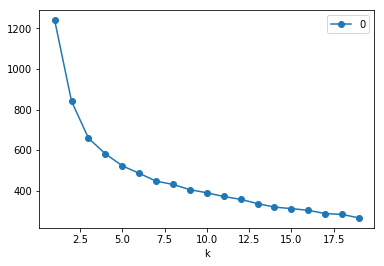

,0
k,
1,1240.000000
2,840.063018
3,658.506155
4,581.489675
5,522.527450
6,485.512727
7,447.008378
8,430.568418
9,404.862167


In [142]:
# nicht klausurrelevant (Erstellung des Plots!)
cluster_SSEs_viz.plot(marker = "o"); plt.show()
cluster_SSEs_viz.head(10)

The SSE is reduced significantly until k=7 --> the optimal k will probably range from 4-7

In [147]:
model_opt = KMeans(5)

model_opt.fit(wh1_scaled)
clust_labels_opt = model_opt.predict(wh1_scaled)
clust_labels_opt

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1,
       1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1,
       1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 0, 4, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 4, 0, 4, 0, 0, 2, 2, 0, 4, 2, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0,
       0])

In [148]:
wh1_viz_opt = wh1.copy()
wh1_viz_opt['cluster'] = clust_labels_opt
wh1_viz_opt['Country'] = wh.iloc[:,0]

data = [dict(type='choropleth',
             locations = wh1_viz_opt['Country'],
             locationmode = 'country names',
             z = wh1_viz_opt['cluster'],
             text = wh1_viz_opt['Country'],
             colorbar = {'title':'Cluster'})]

layout = dict(title='Clustering of Countries based on K-Means',
              geo=dict(showframe = False,
                       projection = {'type':'mercator'}))

map1 = go.Figure(data = data, layout=layout)
iplot(map1)

# Optimizing k based on a silhouette analysis

[0.428726219443225, 0.2874243465134664, 0.2783990169461031, 0.20854223546861306, 0.18705289832960467, 0.14243681244483858, 0.12395931085766977, 0.13619103842630195, 0.15395480053219848, 0.088951257878455, 0.11539028683614735, 0.12893481587917172, 0.036991946140347745, 0.1221232507561331, 0.06192334530950226, 0.0594276847022673, 0.08686269806490773, 0.08152204693749045]


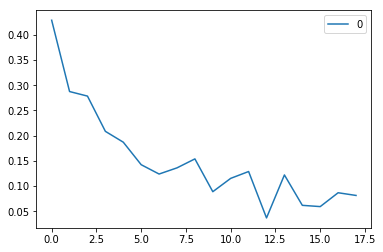

In [184]:
# calculate the silhouette_score per k
# for silhouette see https://en.wikipedia.org/wiki/Silhouette_(clustering)
# ACHTUNG: genaue Berechnungsformel nicht klausurrelevant. Aber relevant: 
from sklearn.metrics import silhouette_score

k_range = range(2, 20)
cluster_scs = []
cluster_dbs = []
for num_clusters in k_range:
    model = KMeans(num_clusters)
    model.fit(wh1_scaled)
    clust_labels = model.predict(wh1_scaled)
    cluster_scs.append(silhouette_score(wh1, clust_labels))
    
print(cluster_scs)
pd.DataFrame(cluster_scs).plot(); plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2818492749491959
For n_clusters = 3 The average silhouette_score is : 0.27302237734842394
For n_clusters = 4 The average silhouette_score is : 0.21696936162305291
For n_clusters = 5 The average silhouette_score is : 0.21767755076362394
For n_clusters = 6 The average silhouette_score is : 0.22342711320074052
For n_clusters = 7 The average silhouette_score is : 0.1940258499919232


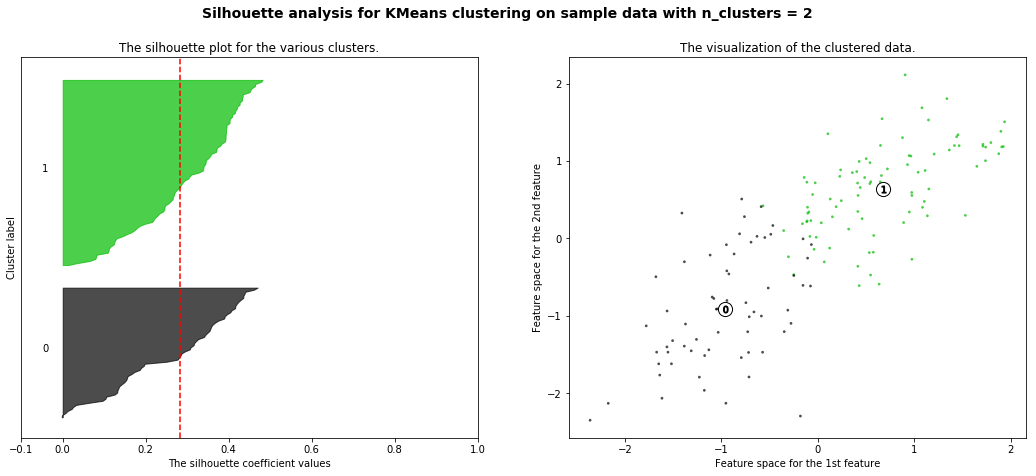

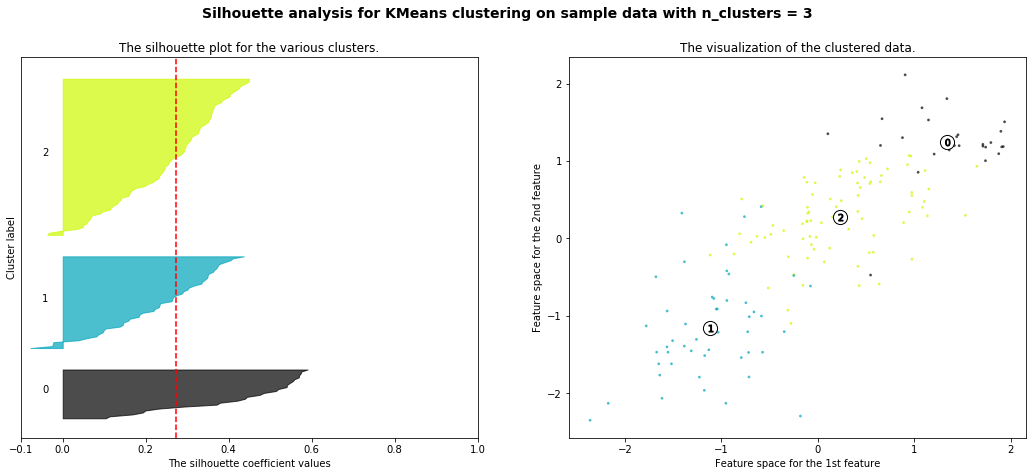

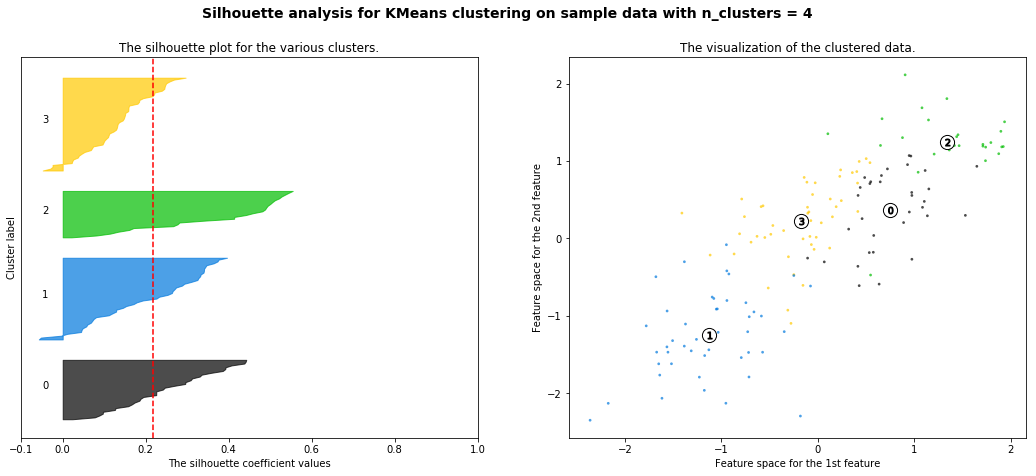

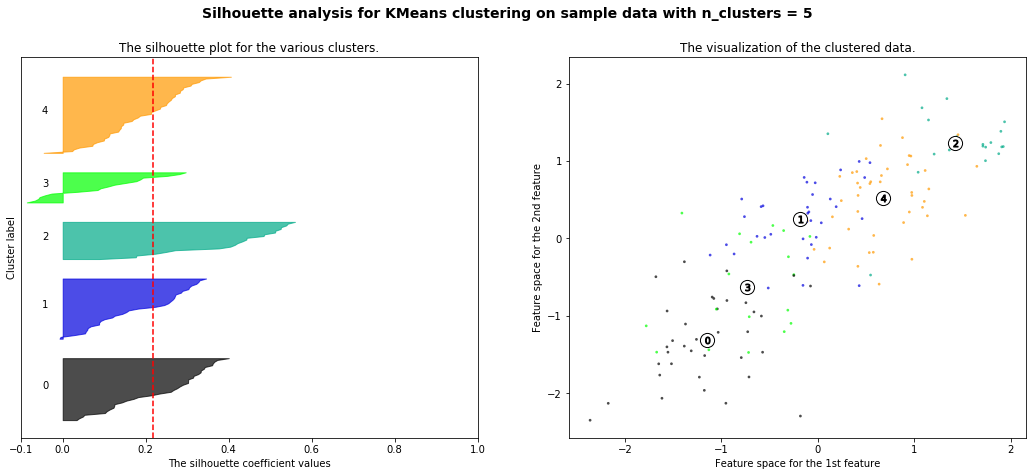

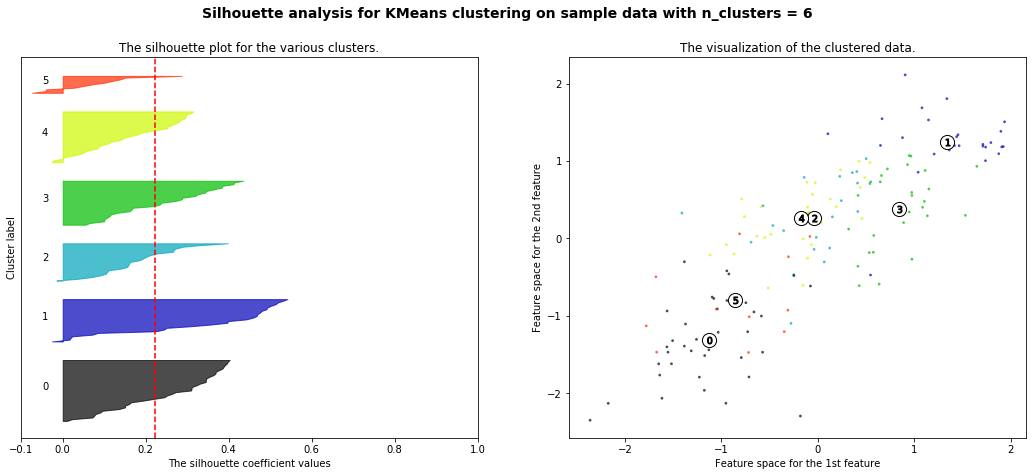

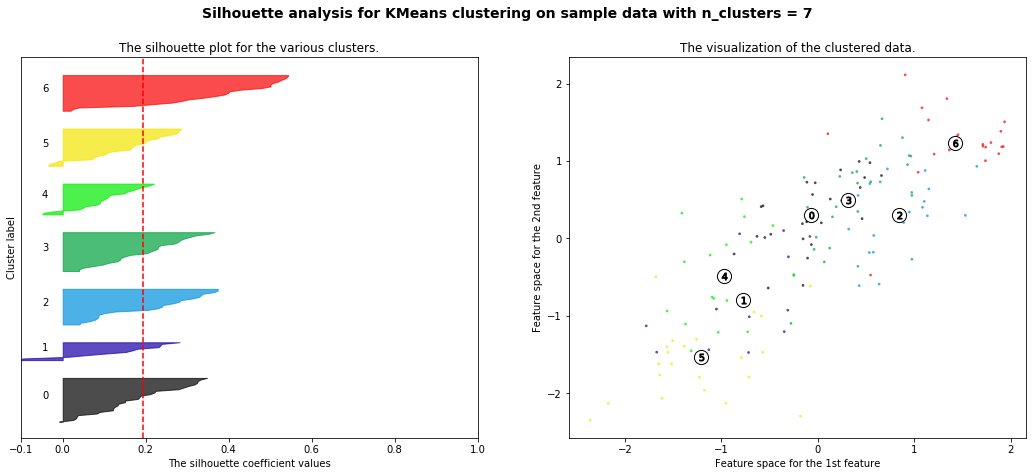

In [186]:
# visualizing the silhouette graphs
# see https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# ACHTUNG: nicht klausurrelevant, diesen Graph zu erstellen
# Aber: Interpretation relevant
# The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring 
# clusters and thus provides a way to assess parameters like number of clusters visually. 
# This measure has a range of [-1, 1].
# Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from
# the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary
# between two neighboring clusters and negative values indicate that those samples might have been assigned 
# to the wrong cluster.

from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
%matplotlib inline
X = wh1_scaled.copy()
range_n_clusters = range(2, 8)


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()